In [1]:
#kernel = .venv
#codes copies from this link:
#https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/

import time
from time import time
t0=time()

import numpy as np
from numpy import sqrt

import pandas as pd
from pandas import read_csv

from tensorflow.keras import layers,models,callbacks #should I remove?
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

import keras

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer
from sklearn.pipeline import make_pipeline
from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import fetch_california_housing


import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

if 'model' in globals():
    del model

t1=time()
print('initial time=',t1)
print('time=',round(t1-t0,1),'s')

initial time= 1595836206.921747
time= 5.0 s


In [2]:
t1=time()

#create synthetic data
N_train=7500000
N_test =2500000

N_train=750000
N_test =250000

# N_train=7500
# N_test =2500
nx_=1


x_train=np.random.rand(N_train)*4
y_train=np.zeros(N_train)
x_test=np.random.rand(N_test)*4
y_test=np.zeros(N_test)


#with vectorization
def myfunc(x):
    y=np.zeros(len(x))
    for i in range(7+1):
        y=y+np.power(x,i)
    y=np.where(y>=1600,1600,np.where(y>=1200,1200,np.where(y>=800,800,np.where(y>=400,400,y))))
    return y

#vfunc = np.vectorize(myfunc) #it actually hurts the performance


y_train=myfunc(x_train)
y_test=myfunc(x_test)

xmax=max(x_train)
ymax=max(y_train)

x_train=x_train/xmax
y_train=y_train/ymax

x_test=x_test/xmax
y_test=y_test/ymax

t2=time(); print('time=',round(t2-t1,1),'s'); t1=t2

time= 0.6 s


In [3]:
###############tensorflow fully connected (dense) regression

epoch_=50;
batch_size_=5000 #bigger batch sizes are not good



wid_=8;			dep_=1;			activation_='relu'			#MSE * 1e4 =  0.0005997383923594999
wid_=8;			dep_=2;			activation_='tanh'			#MSE * 1e4 =  0.009752472850023612

# define model
if 'model' in globals():
    del model
model = Sequential()
model.add(Dense(wid_, activation=activation_, kernel_initializer='he_normal', input_shape=(nx_,)))
model.add(Dense(1))


wid_=16;		dep_=16;		activation_='tanh';			#MSE * 1e4 =  0.1408823252082908
wid_=16;		dep_=2;			activation_='relu';			#MSE * 1e4 =  0.001052005001494346
wid_=20 ;		dep_=4 ;		activation_='relu';			#
wid_=15 ;		dep_=1 ;		activation_='tanh';			#MSE*1e4= 11.369 , time= 7:15 min:sec
wid_=16;		dep_=16;		activation_='relu';			#about 20 minutes
wid_=18;		dep_=28;		activation_='relu';			#MSE*1e4= 0.782 , time= 18:30
															#

# define model
if 'model' in globals():
    del model
model = Sequential()
model.add(Dense(wid_, activation=activation_, kernel_initializer='he_normal', input_shape=(nx_,)))
for i in range(dep_-1):
    model.add(Dense(wid_, activation=activation_, kernel_initializer='he_normal'))
model.add(Dense(1))




In [4]:
# compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [5]:
t1=time()

# fit the model
model.fit(x_train, y_train, epochs=epoch_, batch_size=batch_size_, verbose=2, validation_split=0.1,
          callbacks=[callbacks.EarlyStopping(monitor='val_loss', patience=10,verbose=2, mode='auto')])

t2=time(); tt=t2-t1; tminute=tt//60; tsec=tt-tminute*60; print('\r\ntime= ',int(tminute),':',int(tsec),sep=''); t1=t2

Epoch 1/50
135/135 - 3s - loss: 0.0250 - mse: 0.0250 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 2/50
135/135 - 3s - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 3/50
135/135 - 3s - loss: 0.0011 - mse: 0.0011 - val_loss: 7.3851e-04 - val_mse: 7.3851e-04
Epoch 4/50
135/135 - 3s - loss: 7.4756e-04 - mse: 7.4756e-04 - val_loss: 5.5710e-04 - val_mse: 5.5710e-04
Epoch 5/50
135/135 - 3s - loss: 7.0598e-04 - mse: 7.0598e-04 - val_loss: 8.8100e-04 - val_mse: 8.8100e-04
Epoch 6/50
135/135 - 3s - loss: 6.6931e-04 - mse: 6.6931e-04 - val_loss: 8.3082e-04 - val_mse: 8.3082e-04
Epoch 7/50
135/135 - 3s - loss: 7.3368e-04 - mse: 7.3368e-04 - val_loss: 5.3693e-04 - val_mse: 5.3693e-04
Epoch 8/50
135/135 - 3s - loss: 5.8674e-04 - mse: 5.8674e-04 - val_loss: 5.2982e-04 - val_mse: 5.2982e-04
Epoch 9/50
135/135 - 3s - loss: 6.2794e-04 - mse: 6.2794e-04 - val_loss: 5.2157e-04 - val_mse: 5.2157e-04
Epoch 10/50
135/135 - 3s - loss: 6.0223e-04 - mse: 6.0223e-04 - val_loss: 5.7000e-04 -

In [6]:
t1=time()

# evaluate the model
error = model.evaluate(x_train, y_train, verbose=1, batch_size=min(1000000,len(x_train)))

t2=time(); print('\r\ntime=',round(t2-t1,1),'s'); t1=t2

1/1 [==============================] - 0s 3ms/step - loss: 6.0512e-04 - mse: 6.0512e-04

time= 0.8 s


In [7]:
t1=time()

# make a prediction
y_test_hat = model.predict(x_test, batch_size=min(1000000,len(x_train)))

t2=time(); print('\r\ntime=',round(t2-t1,1),'s'); t1=t2


time= 0.5 s


In [8]:
mse = mean_squared_error(y_test,y_test_hat)
print('#MSE * 1e4 = ', round(mse*1e4,3))

#MSE * 1e4 =  6.0


In [9]:
ind_test=np.argsort(x_test)

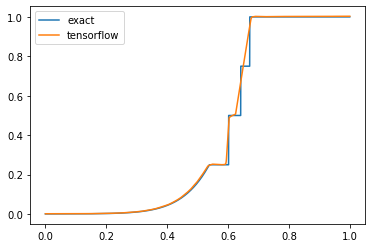

In [10]:
plt.plot(x_test[ind_test],y_test[ind_test], label='exact')#, linestyle='None', markersize = 10.0
plt.plot(x_test[ind_test],y_test_hat[ind_test], label='tensorflow')#, linestyle='None', markersize = 10.0
plt.legend()

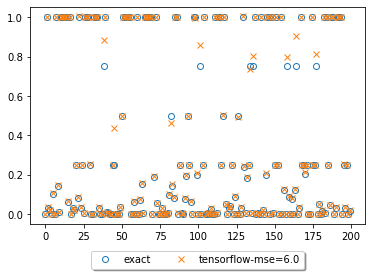

In [11]:
plt.plot(np.arange(200),y_test[0:200], label='exact'                                 ,marker='o',linestyle='None', mfc='none')
plt.plot(np.arange(200),y_test_hat[0:200], label='tensorflow-mse='+str(round(mse*1e4,2)),marker='x',linestyle='None')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),fancybox=True, shadow=True, ncol=5)

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 18)                36        
_________________________________________________________________
dense_3 (Dense)              (None, 18)                342       
_________________________________________________________________
dense_4 (Dense)              (None, 18)                342       
_________________________________________________________________
dense_5 (Dense)              (None, 18)                342       
_________________________________________________________________
dense_6 (Dense)              (None, 18)                342       
_________________________________________________________________
dense_7 (Dense)              (None, 18)                342       
_________________________________________________________________
dense_8 (Dense)              (None, 18)               